## <center> Homework4- Part-2
##   <center> Anshika Sharma, UCLA ID:305488635

In [1]:
import numpy as np
import pandas as pd
import download_data as dl
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics
from conf_matrix import func_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values
n = 200
#split data 
np.random.seed(17)
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()

In [3]:
## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.
#############placeholder 1: training/validation #######################
n2 = len(Xtr)
np.random.seed(10)
S2 = np.random.permutation(n2)
# subsets for training and validating models 
#x_train,x_validation,y_train,y_validation = train_test_split(Xtr,Ytr,test_size=0.5)
x_train = Xtr[S2[:50], :6]
y_train = Ytr[S2[:50]].flatten()
x_validation = Xtr[S2[50:], :6]
y_validation = Ytr[S2[50:]].flatten()
#############placeholder end #######################

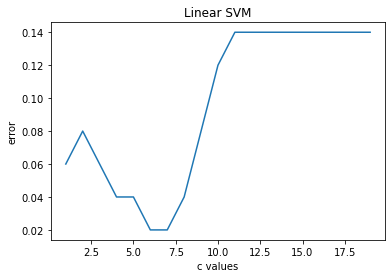

In [4]:
# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder 2: Figure 1#######################
c_range =  range(1,20)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train.ravel())
    np.random.seed(10)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
#plt.xticks(c_range)
plt.show()
#############placeholder end #######################

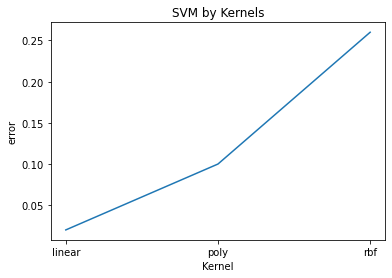

In [5]:
# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder 3: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    # your own codes
    model = svm.SVC(kernel=kernel_value, C=6)
    model.fit(X=x_train, y=y_train.ravel())
    np.random.seed(0)
    error = 1. - model.score(x_validation, y_validation) 
    svm_kernel_error.append(error)
    

plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()
#############placeholder end #######################

In [6]:
## step 4 Select the best model and apply it over the testing subset 
#############placeholder 4:testing  #######################
# write your own codes to select the best hyper-parameters: kernel and C.

#Using different kernels and parameters to see what optimal value of C is obtained

#linear kernal 
print("Parameter Selection for kernal linear")
for i in range (5,20):
    model = svm.SVC(kernel = 'linear', C = i, gamma= 10) # change kernl type, C, gamma 
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    print('c: ',i, 'error: ', error)

#Polynomial kernel  
print("Parameter Selection for Polynomial linear")

for i in range (5,20):
    model = svm.SVC(kernel = 'poly', C = i, gamma= 0.001) # change kernl type, C, gamma 
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    print('c: ',i, 'error: ', error)

# RBF kernel 
print("Parameter Selection for RBF linear")
for i in range (5,20):
    model = svm.SVC(kernel = 'rbf', C = i, gamma= 0.001) # change kernl type, C, gamma 
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    print('c: ',i, 'error: ', error)

print("The best score is linear kernal with c = 6 ") # 


#######################################################

#manually selecting

best_kernel = 'linear'
best_c = 6 # poly had many that were the "best"
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train.ravel())

#############placeholder end #######################


Parameter Selection for kernal linear
c:  5 error:  0.040000000000000036
c:  6 error:  0.020000000000000018
c:  7 error:  0.020000000000000018
c:  8 error:  0.040000000000000036
c:  9 error:  0.07999999999999996
c:  10 error:  0.12
c:  11 error:  0.14
c:  12 error:  0.14
c:  13 error:  0.14
c:  14 error:  0.14
c:  15 error:  0.14
c:  16 error:  0.14
c:  17 error:  0.14
c:  18 error:  0.14
c:  19 error:  0.14
Parameter Selection for Polynomial linear
c:  5 error:  0.07999999999999996
c:  6 error:  0.09999999999999998
c:  7 error:  0.09999999999999998
c:  8 error:  0.09999999999999998
c:  9 error:  0.09999999999999998
c:  10 error:  0.09999999999999998
c:  11 error:  0.12
c:  12 error:  0.09999999999999998
c:  13 error:  0.09999999999999998
c:  14 error:  0.12
c:  15 error:  0.12
c:  16 error:  0.12
c:  17 error:  0.12
c:  18 error:  0.12
c:  19 error:  0.12
Parameter Selection for RBF linear
c:  5 error:  0.30000000000000004
c:  6 error:  0.26
c:  7 error:  0.24
c:  8 error:  0.18000000

SVC(C=6, kernel='linear')

In [7]:
## step 5 evaluate your results in terms of accuracy, real, or precision. 

#############placeholder 5: metrics #######################
# func_confusion_matrix is provided in conf_matrix.py
# You might re-use this function from previous homework assignment.
y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

#############placeholder end #######################

Confusion Matrix: 
[[44  4]
 [ 1 51]]
Average Accuracy: 0.95
Per-Class Precision: [0.97777778 0.92727273]
Per-Class Recall: [0.91666667 0.98076923]


In [8]:
#############placeholder 6 #######################
print("Successful examples")
feast = []
count = 0
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_actual:" ,Y_test[i], "Y_hat:" ,y_pred[i], "Feature:", X_test[i])
        count = count+1
        a = [Y_test[i]]
        a.append(y_pred[i])
        a.extend(X_test[i])
        feast.append(a)
    if count == 5: break

# Failure samples: In my model, there are only 4 predicted valued that is incorrect.
print("\n")

print("Failure examples")

feasf = []
count = 0
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_actual:" ,Y_test[i], "y_hat:" ,y_pred[i], "Feature:", X_test[i] )
        count = count+1
        b = [Y_test[i]]
        b.append(y_pred[i])
        b.extend(X_test[i])
        feasf.append(b)
    if count == 5: break


Successful examples
Y_actual: -1.0 Y_hat: -1.0 Feature: [ 0.  18.  13.4 36.7 41.3 17.1]
Y_actual: -1.0 Y_hat: -1.0 Feature: [ 1.  19.3 13.5 41.6 47.4 17.8]
Y_actual: -1.0 Y_hat: -1.0 Feature: [ 1.  11.8  9.6 24.2 27.8  9.7]
Y_actual: -1.0 Y_hat: -1.0 Feature: [ 0.  17.1 12.6 35.  38.9 15.7]
Y_actual: -1.0 Y_hat: -1.0 Feature: [ 1.  16.1 12.8 34.9 40.7 15.7]


Failure examples
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   9.5  8.2 19.6 22.4  7.8]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 0.  18.5 14.6 37.  42.  16.6]
Y_actual: -1.0 y_hat: 1.0 Feature: [ 1.  11.8 10.5 25.2 29.3 10.3]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 0.  11.4  9.2 21.7 24.1  9.7]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 0.  15.  12.3 30.1 33.3 14. ]


In [9]:
# Average value of 
import pandas as pd
xdf = pd.DataFrame(X_test)
print("Average value of each features: ")
print(xdf.mean(axis = 0),'\n')
print("Meadian of each features: ")
xdf.median(axis = 0) 

Average value of each features: 
0     0.550
1    15.287
2    12.578
3    31.578
4    35.901
5    13.720
dtype: float64 

Meadian of each features: 


0     1.00
1    15.35
2    12.60
3    31.75
4    36.50
5    13.80
dtype: float64

In [10]:
sum1 = feast + feasf # combine dataframe (sucessful cases and failure case)
sum1

[[-1.0, -1.0, 0.0, 18.0, 13.4, 36.7, 41.3, 17.1],
 [-1.0, -1.0, 1.0, 19.3, 13.5, 41.6, 47.4, 17.8],
 [-1.0, -1.0, 1.0, 11.8, 9.6, 24.2, 27.8, 9.7],
 [-1.0, -1.0, 0.0, 17.1, 12.6, 35.0, 38.9, 15.7],
 [-1.0, -1.0, 1.0, 16.1, 12.8, 34.9, 40.7, 15.7],
 [1.0, -1.0, 1.0, 9.5, 8.2, 19.6, 22.4, 7.8],
 [1.0, -1.0, 0.0, 18.5, 14.6, 37.0, 42.0, 16.6],
 [-1.0, 1.0, 1.0, 11.8, 10.5, 25.2, 29.3, 10.3],
 [1.0, -1.0, 0.0, 11.4, 9.2, 21.7, 24.1, 9.7],
 [1.0, -1.0, 0.0, 15.0, 12.3, 30.1, 33.3, 14.0]]

In [11]:
#Rename index and column
summary = pd.DataFrame(sum1, columns = ['Y_actual', 'Y_hat', 'f1','f2','f3','f4','f5','f6' ], 
                       index = np.repeat(['Sucess', 'Failure'], [5, 5], axis=0))

In [12]:
#Sumarize statistics of features
mea = pd.DataFrame(xdf.mean(axis = 0), columns = ['mean']).T #mean
med = pd.DataFrame(xdf.median(axis = 0), columns = ['median']).T #meandian
sum3 = pd.concat([mea, med]) #comebine table
sum3.columns = ['f1','f2','f3','f4','f5','f6'] # rename columns
sum3.insert(0, "Y_actual",['-','-'] ) #insert Na for Y actual
sum3.insert(1, "Y_hat",['-','-'] ) 
sum3

,Y_actual,Y_hat,f1,f2,f3,f4,f5,f6
mean,-,-,0.55,15.287,12.578,31.578,35.901,13.72
median,-,-,1.00,15.350,12.600,31.750,36.500,13.80


In [13]:
summary1 = pd.concat([summary,sum3])

In [14]:
summary1

,Y_actual,Y_hat,f1,f2,f3,f4,f5,f6
Sucess,-1,-1,0.00,18.000,13.400,36.700,41.300,17.10
Sucess,-1,-1,1.00,19.300,13.500,41.600,47.400,17.80
Sucess,-1,-1,1.00,11.800,9.600,24.200,27.800,9.70
Sucess,-1,-1,0.00,17.100,12.600,35.000,38.900,15.70
Sucess,-1,-1,1.00,16.100,12.800,34.900,40.700,15.70
Failure,1,-1,1.00,9.500,8.200,19.600,22.400,7.80
Failure,1,-1,0.00,18.500,14.600,37.000,42.000,16.60
Failure,-1,1,1.00,11.800,10.500,25.200,29.300,10.30
Failure,1,-1,0.00,11.400,9.200,21.700,24.100,9.70
Failure,1,-1,0.00,15.000,12.300,30.100,33.300,14.00


<function matplotlib.pyplot.show(*args, **kw)>

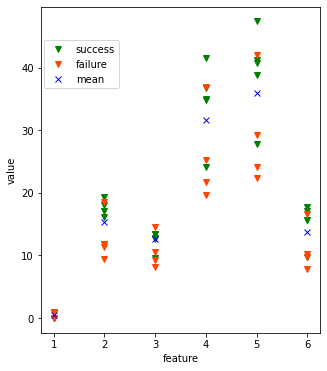

In [16]:
#visulize the value of feature of success and failure 
plt.figure(figsize=(5,6))

# plot the feature value of success example
plt.plot(np.arange(1,7,1), summary1.iloc[ 0 , 2: ] , "v", label="success", c = 'green')
for i in range (1,5,1): 
    plt.plot(np.arange(1,7,1), summary1.iloc[ i , 2: ] , "v",  c = 'green')

# plot the feature value of failure example
plt.plot(np.arange(1,7,1), summary1.iloc[ 5 , 2: ] , "v", label="failure", c = 'orangered')
for i in range (1,4,1): 
    plt.plot(np.arange(1,7,1), summary1.iloc[ i+5 , 2: ] , "v", c = 'orangered')
# plot the mean value of each feature
plt.plot(np.arange(1,7,1), summary1.iloc[ 10 , 2: ] , "x", label="mean", c = 'blue') 

plt.xlabel("feature")
plt.ylabel("value")
xlims = plt.xlim()
plt.xlim(xlims)
plt.legend(loc= (0.01,0.75))

plt.show

In [15]:
xdf = pd.DataFrame(X_test)
print("Average value of each features: ")
print(xdf.mean(axis = 0),'\n')
print("Meadian of each features: ")
xdf.median(axis = 0) 

Average value of each features: 
0     0.550
1    15.287
2    12.578
3    31.578
4    35.901
5    13.720
dtype: float64 

Meadian of each features: 


0     1.00
1    15.35
2    12.60
3    31.75
4    36.50
5    13.80
dtype: float64

In [ ]:
##############Placeholder end######################